Importing the Dependencies

In [868]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

Data collection

In [869]:
df = pd.read_csv("diabetes - DS.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [870]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Finding missing values and data type

In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [888]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Features visulaization

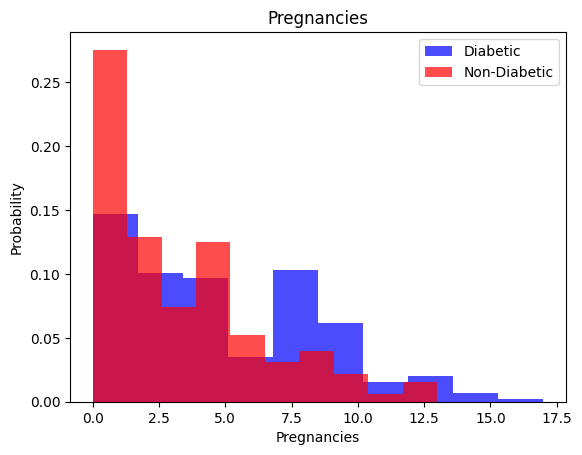

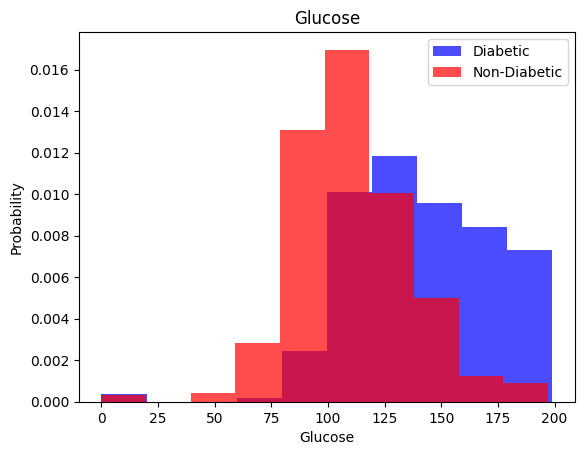

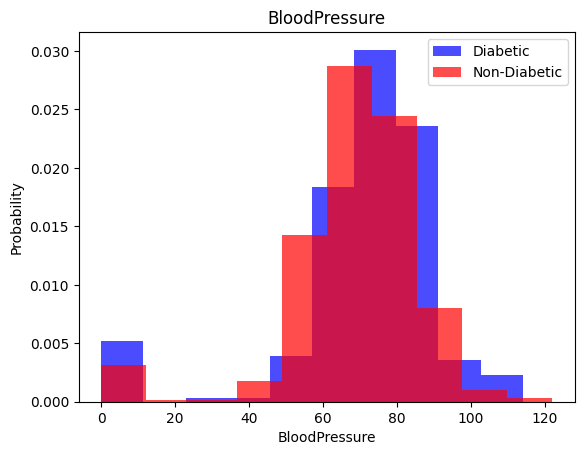

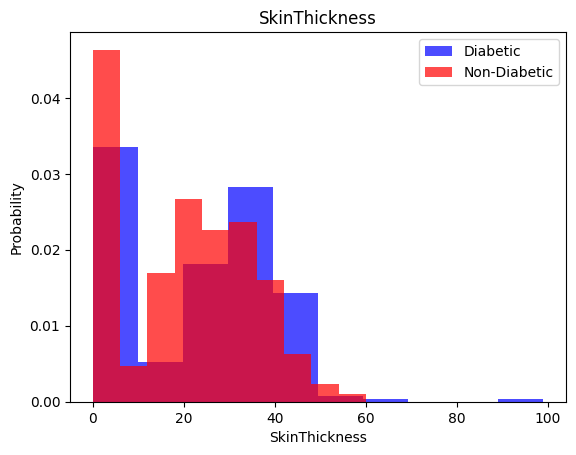

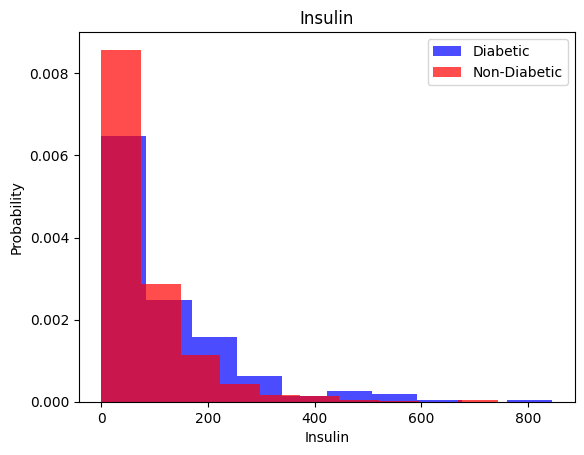

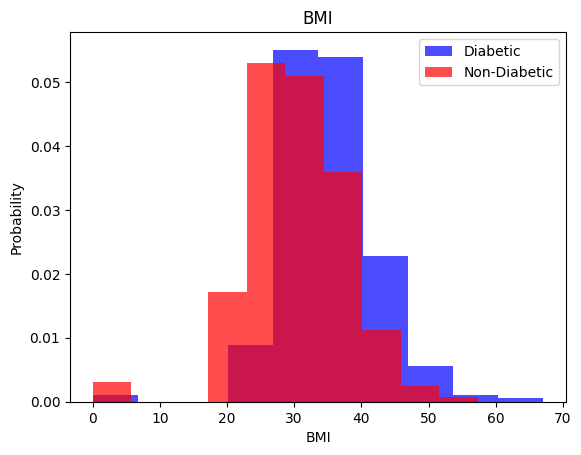

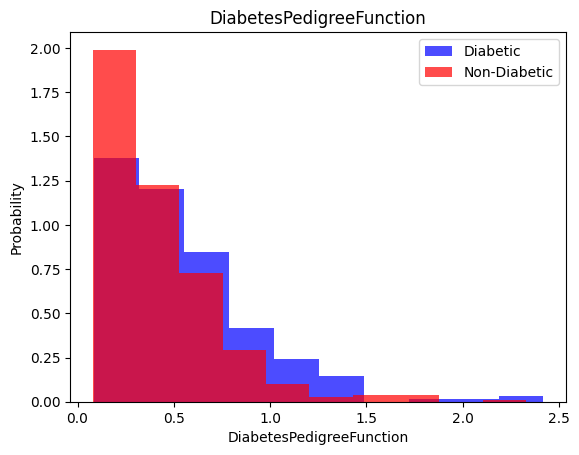

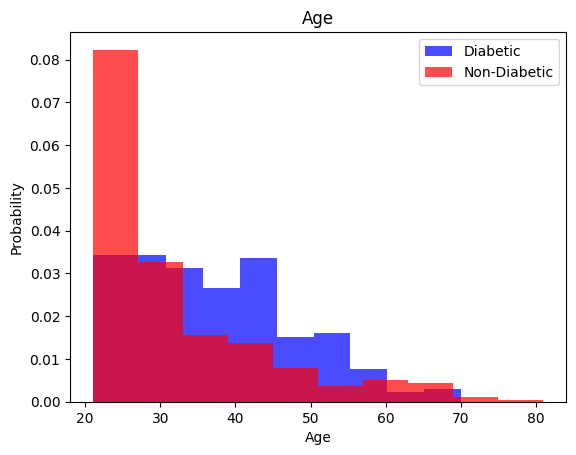

In [873]:

for label in df.columns[:-1]:
    plt.hist(df[df["Outcome"]==1][label], color="blue", alpha=0.7, label="Diabetic", density=True)
    plt.hist(df[df["Outcome"]==0][label], color="red", alpha=0.7, label="Non-Diabetic", density=True)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.title(label)
    plt.legend()
    plt.show()  

Removing Outliers

In [874]:
from sklearn.ensemble import IsolationForest

# fit the model to the data
model = IsolationForest()

# use the model to predict which rows are outliers
predictions = model.fit_predict(df)

# select only the rows that are not outliers
df = df[predictions != -1]
df.shape

(635, 9)

Target variable Analysis

In [875]:
#counts of the Outcomes
df['Outcome'].value_counts()

0    446
1    189
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

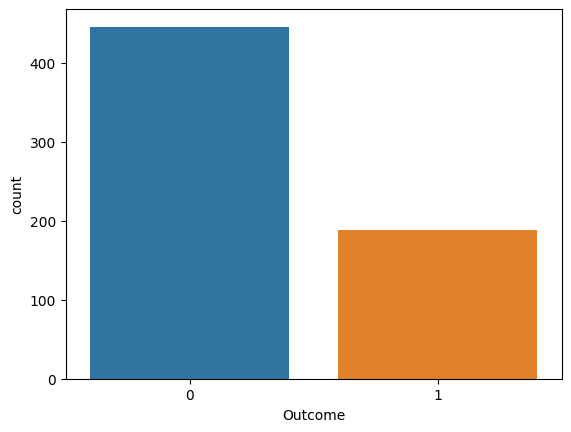

In [876]:
sns.countplot(x="Outcome", data=df)     

In [877]:
#seperating data and labels
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [878]:
train, test = np.split(df.sample(frac=1),[int(0.85*len(df))])

In [879]:
def scale_dataset(df, oversample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    #scaling features
    scalar = StandardScaler()
    X = scalar.fit_transform(X)

    #overlampling the minority class
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    Data = np.hstack((X, np.reshape(y,(-1,1))))

    return Data, X, y   

In [880]:
Train, X_train, y_train = scale_dataset(train,oversample=True)
# Valid, X_valid, y_valid = scale_dataset(valid,oversample=False)
Test, X_test, y_test = scale_dataset(test,oversample=False)

Model Evaluations

Random Forest

In [881]:
random = RandomForestClassifier(max_depth=8)
random.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(random.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(random.score(X_test, y_test)))

#Displaying Cross-validayion scores
scores = cross_val_score(random, X, y,cv=KFold())
print("CV scores:",scores)
print("Average CV score: {:.3f}".format(scores.mean()))

Accuracy on training set: 0.972
Accuracy on test set: 0.771
CV scores: [0.80314961 0.69291339 0.81102362 0.86614173 0.79527559]
Average CV score: 0.794


K-Nearest Neighbors

In [882]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

#Displaying Cross-validayion scores
scores = cross_val_score(knn, X, y,cv=KFold())
print("CV scores:",scores)
print("Average CV score: {:.3f}".format(scores.mean()))

Accuracy on training set: 0.857
Accuracy on test set: 0.698
CV scores: [0.77165354 0.71653543 0.76377953 0.77952756 0.72440945]
Average CV score: 0.751


XGBoost

In [883]:
xg_model = xgb.XGBClassifier(max_depth=2,max_bin=10)
xg_model.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(xg_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xg_model.score(X_test, y_test)))

#Displaying Cross-validayion scores
scores = cross_val_score(xg_model, X, y,cv=KFold())
print("CV scores:",scores)
print("Average CV score: {:.3f}".format(scores.mean()))

Accuracy on training set: 0.930
Accuracy on test set: 0.792
CV scores: [0.77165354 0.73228346 0.77952756 0.84251969 0.77165354]
Average CV score: 0.780


Logistic Regression

In [884]:
log = LogisticRegression(max_iter=200)
log.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(log.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(log.score(X_test, y_test)))

#Displaying Cross-validayion scores
scores = cross_val_score(log, X, y,cv=KFold())
print("CV scores:",scores)
logScore = scores.mean()
print("Average CV score: {:.3f}".format(logScore))

Accuracy on training set: 0.739
Accuracy on test set: 0.719
CV scores: [0.80314961 0.7480315  0.79527559 0.8503937  0.80314961]
Average CV score: 0.800


Cross Validation for each model

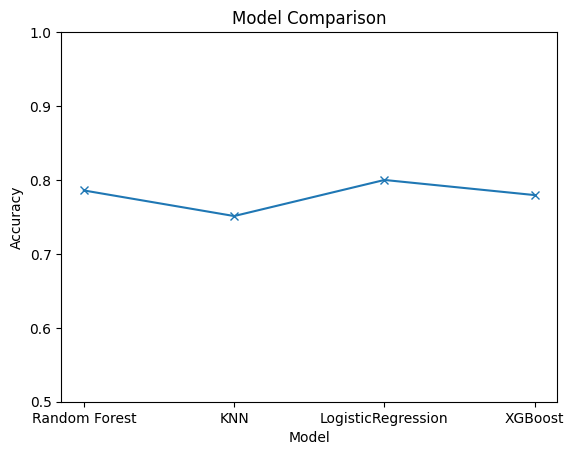

In [885]:
models = [random,knn,log,xg_model]
means = []
for model in models:
    kfold = KFold(n_splits=5)
    scores = cross_val_score(model, X, y, cv=kfold)
    means.append(scores.mean())
   
labels = ["Random Forest", "KNN", "LogisticRegression","XGBoost"]
plt.plot(labels,means, marker='x')
plt.ylim(0.5,1)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

In [886]:
#Selecting the LogisticRegression
y_pred = log.predict(X_test)

print(classification_report(y_test,y_pred))

print("Average CV score: {:.3f}".format(logScore))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        66
           1       0.54      0.63      0.58        30

    accuracy                           0.72        96
   macro avg       0.68      0.70      0.69        96
weighted avg       0.73      0.72      0.72        96

Average CV score: 0.800
